In [10]:
#Importamos las librerías necesarias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

In [11]:
undesa = pd.read_csv("data/undesa.csv",  sep=",")

#### EDA (Análisis exploratorio de datos)

In [12]:
undesa.head()

,Region_group_of_destination,Location code of destination,WORLD,Latin America and the Caribbean,Europe and Northern America,Developed regions,Less developed regions,Less developed regions excluding least developed,Middle-income countries,Upper-middle-income-countries,Lower-middle-income countries,Low-income countries,AFRICA,ASIA,EUROPE,Caribbean,Central America,South America,NORTHERN AMERICA,year
0,WORLD,900,280598105,42890481,67601621,69815370,198125584,150520987,177395834,87648518,89747316,37419672,40567163,114911484,63273663,9078772,16198974,17612735,4327958,2020
1,Sub-Saharan Africa,947,22221538,30679,527437,541895,19257181,4090210,6021306,412419,5608887,13147474,18993545,234293,497863,13685,1051,15943,29574,2020
2,Northern Africa and Western Asia,1833,49767746,68381,2772902,2790395,44942830,35578068,33927565,6258527,27669038,11754346,6567141,38312471,2600363,329,3939,64113,172539,2020
3,Central and Southern Asia,921,19427576,14684,4590984,4612050,13771372,4974131,13517912,4856366,8661546,4485915,56405,13715893,4507238,56,0,14628,83746,2020
4,Eastern and South-Eastern Asia,1832,19591106,333438,518524,710241,17690334,12501179,16468832,8696270,7772562,18199,20577,17442736,212621,145,2962,330331,305903,2020


In [13]:
undesa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 336 entries, 0 to 335
Data columns (total 20 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Region_group_of_destination                       336 non-null    object
 1   Location code of destination                      336 non-null    int64 
 2   WORLD                                             336 non-null    int64 
 3   Latin America and the Caribbean                   336 non-null    int64 
 4   Europe and Northern America                       336 non-null    int64 
 5   Developed regions                                 336 non-null    int64 
 6   Less developed regions                            336 non-null    int64 
 7   Less developed regions excluding least developed  336 non-null    int64 
 8   Middle-income countries                           336 non-null    int64 
 9   Upper-middle-income-countries   

Tendencia migratoria de la región Latin America and the Caribbean 1990-2020

In [14]:
world_rows = undesa[undesa['Region_group_of_destination'] == 'WORLD']
# world_rows.groupby("year")["latin america"].sum()
latin_america_data = world_rows[['year', 'Latin America and the Caribbean']]
# Mostrar las filas filtradas
print(latin_america_data)

     year  Latin America and the Caribbean
0    2020                         42890481
48   2015                         36206000
96   2010                         34637650
144  2005                         29338206
192  2000                         24628700
240  1995                         19669704
288  1990                         15273399


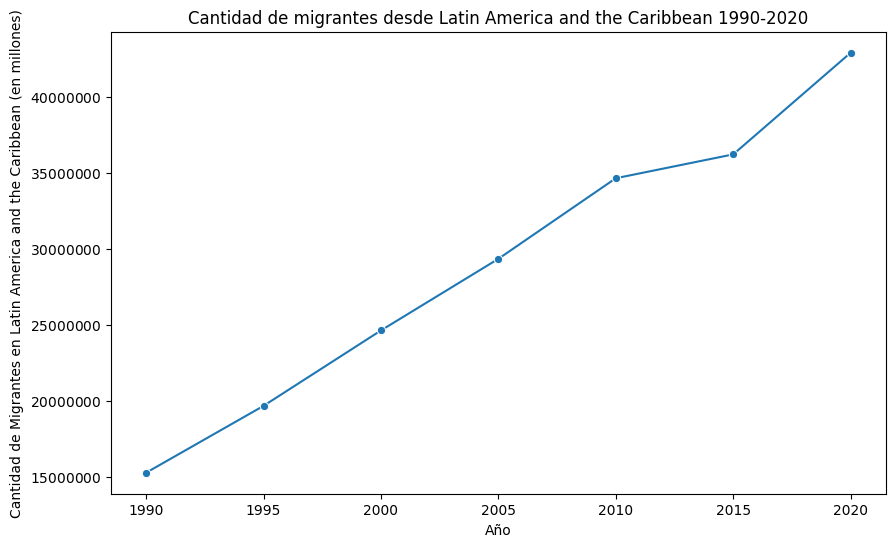

In [15]:
# Filtrar los datos para "Latin America and the Caribbean" y "WORLD"
world_rows = undesa[undesa['Region_group_of_destination'] == 'WORLD']
latin_america_data = world_rows[['year', 'Latin America and the Caribbean']]

# Crear el gráfico de líneas
plt.figure(figsize=(10, 6))
sns.lineplot(data=latin_america_data, x='year', y='Latin America and the Caribbean', marker='o')

# Agregar etiquetas y título
plt.xlabel("Año")
plt.ylabel("Cantidad de Migrantes en Latin America and the Caribbean (en millones)")

# Formatear el eje Y para mostrar valores en millones
formatter = mticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(False)
formatter.set_powerlimits((-3, 4))
plt.gca().yaxis.set_major_formatter(formatter)

plt.title("Cantidad de migrantes desde Latin America and the Caribbean 1990-2020")

# Mostrar el gráfico
plt.show()

Variación porcentual migratoria por intervalos de tiempo de 5 años (1990-2020)

In [16]:
data = [
    (1990, 1995),
    (1995, 2000),
    (2000, 2005),
    (2005, 2010),
    (2010, 2015),
    (2015, 2020)
]

for start_year, end_year in data:
    valor_inicial = latin_america_data[latin_america_data['year'] == start_year]['Latin America and the Caribbean'].values[0]
    valor_final = latin_america_data[latin_america_data['year'] == end_year]['Latin America and the Caribbean'].values[0]
    
    aumento_porcentual = ((valor_final - valor_inicial) / valor_inicial) * 100
    print(f"El aumento porcentual de {start_year} a {end_year} es:", aumento_porcentual, "%")

El aumento porcentual de 1990 a 1995 es: 28.784064372311626 %
El aumento porcentual de 1995 a 2000 es: 25.211340241825702 %
El aumento porcentual de 2000 a 2005 es: 19.122024304977526 %
El aumento porcentual de 2005 a 2010 es: 18.063285805546528 %
El aumento porcentual de 2010 a 2015 es: 4.527876458131542 %
El aumento porcentual de 2015 a 2020 es: 18.4623570678893 %


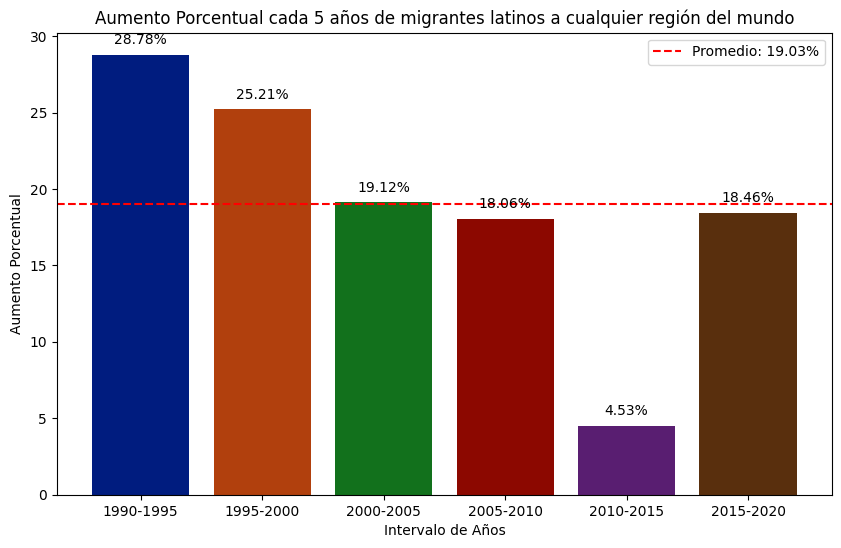

In [17]:
intervals = []
aumentos_porcentuales = []

data = [
    (1990, 1995),
    (1995, 2000),
    (2000, 2005),
    (2005, 2010),
    (2010, 2015),
    (2015, 2020)
]

for start_year, end_year in data:
    valor_inicial = latin_america_data[latin_america_data['year'] == start_year]['Latin America and the Caribbean'].values[0]
    valor_final = latin_america_data[latin_america_data['year'] == end_year]['Latin America and the Caribbean'].values[0]
    
    aumento_porcentual = ((valor_final - valor_inicial) / valor_inicial) * 100
    intervals.append(f"{start_year}-{end_year}")
    aumentos_porcentuales.append(aumento_porcentual)

# Calcular el promedio de las variaciones porcentuales
promedio_aumentos = sum(aumentos_porcentuales) / len(aumentos_porcentuales)

# Generar una lista de colores de la paleta dark de Seaborn
colors = sns.color_palette("dark", n_colors=len(intervals))

# Crear el gráfico de barras con colores personalizados
plt.figure(figsize=(10, 6))
bars = plt.bar(intervals, aumentos_porcentuales, color=colors)

# Agregar las cifras de variación porcentual sobre las barras
for bar, aumento_porcentual in zip(bars, aumentos_porcentuales):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.5, f"{aumento_porcentual:.2f}%", ha='center', va='bottom', fontsize=10)

# Agregar el promedio como una línea horizontal
plt.axhline(y=promedio_aumentos, color='red', linestyle='--', label=f'Promedio: {promedio_aumentos:.2f}%')

# Agregar etiquetas y título
plt.xlabel("Intervalo de Años")
plt.ylabel("Aumento Porcentual")
plt.title("Aumento Porcentual cada 5 años de migrantes latinos a cualquier región del mundo")
plt.legend()

# Mostrar el gráfico
plt.show()

Distribución geográfica de migrantes en la región Latin America and the Caribbean

In [18]:
latin_america_rows = undesa[undesa['Region_group_of_destination'].apply(lambda x: x.strip() in ['Caribbean', 'Central America', 'South America'])]
latin_america_data = latin_america_rows[['year', 'Latin America and the Caribbean']].copy()
latin_america_data.loc[:, 'Category'] = latin_america_rows['Region_group_of_destination']
print(latin_america_data)

     year  Latin America and the Caribbean           Category
39   2020                          1050647          Caribbean
40   2020                          1194276    Central America
41   2020                          9052250      South America
87   2015                           940613          Caribbean
88   2015                           859613    Central America
89   2015                          4366500      South America
135  2010                           771209          Caribbean
136  2010                           780384    Central America
137  2010                          3792591      South America
183  2005                           703367          Caribbean
184  2005                           644805    Central America
185  2005                          3009341      South America
231  2000                           647814          Caribbean
232  2000                           568796    Central America
233  2000                          2560966      South America
279  199

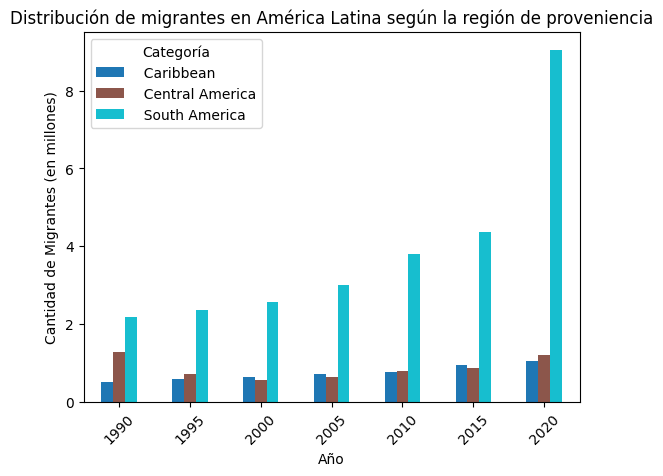

In [19]:
# Tus datos
latin_america_rows = undesa[undesa['Region_group_of_destination'].apply(lambda x: x.strip() in ['Caribbean', 'Central America', 'South America'])]
latin_america_data = latin_america_rows[['year', 'Latin America and the Caribbean']].copy()
latin_america_data['Category'] = latin_america_rows['Region_group_of_destination']

# Convertir los valores a millones
latin_america_data['Latin America and the Caribbean'] /= 1000000

# Pivotear los datos para tener las categorías como columnas
pivot_data = latin_america_data.pivot(index='year', columns='Category', values='Latin America and the Caribbean')

# Crear el gráfico de barras
ax = pivot_data.plot(kind='bar', colormap='tab10')

# Agregar título y etiquetas
plt.title('Distribución de migrantes en América Latina según la región de proveniencia')
plt.xlabel('Año')
plt.ylabel('Cantidad de Migrantes (en millones)')
plt.xticks(rotation=45)
plt.legend(title='Categoría')

# Mostrar el gráfico
plt.show()

Número de migrantes distribuidos por el nivel de ingresos de los países de destino

In [20]:
income_categories = ['High-income countries', 'Middle-income countries']
latin_america_data = undesa[undesa['Region_group_of_destination'].str.contains('|'.join(income_categories))][['year', 'Latin America and the Caribbean']]
latin_america_data['Category'] = undesa[undesa['Region_group_of_destination'].str.contains('|'.join(income_categories))]['Region_group_of_destination'].copy()

print(latin_america_data)

     year  Latin America and the Caribbean                   Category
16   2020                         33714977      High-income countries
17   2020                          9015116    Middle-income countries
64   2015                         30931523      High-income countries
65   2015                          5124242    Middle-income countries
112  2010                         29967194      High-income countries
113  2010                          4536897    Middle-income countries
160  2005                         25524614      High-income countries
161  2005                          3700019    Middle-income countries
208  2000                         21281197      High-income countries
209  2000                          3247925    Middle-income countries
256  1995                         16374656      High-income countries
257  1995                          3199409    Middle-income countries
304  1990                         11606947      High-income countries
305  1990           

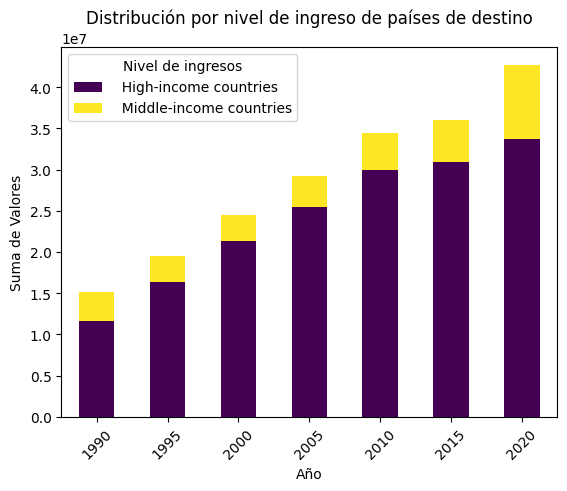

In [21]:

# Agrupar los datos por año y categoría, y calcular la suma
grouped_data = latin_america_data.groupby(['year', 'Category'])['Latin America and the Caribbean'].sum().unstack()

# Crear el gráfico de barras
ax = grouped_data.plot(kind='bar', stacked=True, colormap='viridis')

# Agregar título y etiquetas
plt.title('Distribución por nivel de ingreso de países de destino')
plt.xlabel('Año')
plt.ylabel('Suma de Valores')
plt.xticks(rotation=45)
plt.legend(title='Nivel de ingresos')

# Mostrar el gráfico
plt.show()

Porcentaje de migrantes latinoamericanos según nivel de ingresos de los países de destino

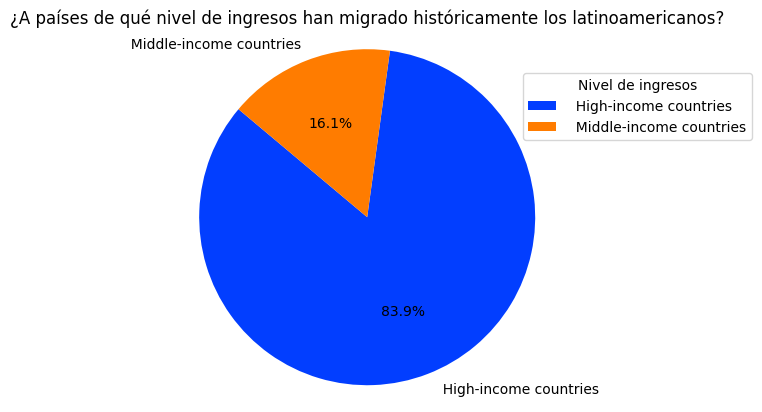

In [22]:
# Convertir los valores a millones
latin_america_data['Latin America and the Caribbean'] /= 1000000

# Agrupar los datos por categoría y calcular la suma
grouped_data = latin_america_data.groupby('Category')['Latin America and the Caribbean'].sum()

# Calcular los porcentajes de cada categoría en relación con el total
total = grouped_data.sum()
percentages = grouped_data / total * 100

# Usar la paleta "deep" de Seaborn
sns.set_palette("bright")

# Crear el gráfico de torta
plt.figure()
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140)
plt.title('¿A países de qué nivel de ingresos han migrado históricamente los latinoamericanos?')
plt.axis('equal')  

# Ajustar la posición de la leyenda a la derecha
plt.legend(title='Nivel de ingresos', loc='center left', bbox_to_anchor=(0.8, 0.8))

plt.show()

Distribución de migrantes latinoamericanos según las regiones a las que migraron

In [23]:
income_categories = ['NORTHERN AMERICA', 'EUROPE', 'OCEANIA', 'ASIA']
latin_america_continent = undesa[undesa['Region_group_of_destination'].str.contains('|'.join(income_categories))][['year', 'Latin America and the Caribbean']].copy()
latin_america_continent['Category'] = undesa[undesa['Region_group_of_destination'].str.contains('|'.join(income_categories))]['Region_group_of_destination'].copy()
print(latin_america_continent)

     year  Latin America and the Caribbean           Category
27   2020                           414658               ASIA
33   2020                          5395924             EUROPE
42   2020                         25535633   NORTHERN AMERICA
43   2020                           214569           OCEANIA 
75   2015                           376798               ASIA
81   2015                          4487571             EUROPE
90   2015                         24980329   NORTHERN AMERICA
91   2015                           164648           OCEANIA 
123  2010                           426361               ASIA
129  2010                          4581301             EUROPE
138  2010                         24134573   NORTHERN AMERICA
139  2010                           132154           OCEANIA 
171  2005                           394800               ASIA
177  2005                          3453004             EUROPE
186  2005                         21019256   NORTHERN AMERICA
187  200

Sumamos ahora la cantidad de migrantes por categoría geográfica y calculamos el porcentaje de cada categoría en relación con el total de migrantes en todas las categorías

In [24]:
# Convertir los valores a millones
latin_america_continent['Latin America and the Caribbean'] /= 1000000

# Agrupar los datos por categoría y calcular la suma
grouped_data = latin_america_continent.groupby('Category')['Latin America and the Caribbean'].sum()

# Calcular los porcentajes de cada categoría en relación con el total
total = grouped_data.sum()
percentages = grouped_data / total * 100

# Crear un DataFrame con los porcentajes
percentages_df = pd.DataFrame({'Category': percentages.index, 'Percentage': percentages.values})

# Agregar el símbolo de porcentaje y redondear los valores a dos decimales
percentages_df['Percentage'] = percentages_df['Percentage'].apply(lambda x: f"{x:.2f}%")

# Mostrar el DataFrame con los porcentajes
print(percentages_df)

            Category Percentage
0               ASIA      1.48%
1             EUROPE     13.46%
2   NORTHERN AMERICA     84.52%
3           OCEANIA       0.53%


Oceanía y Asia representan porcentajes muy bajos. Por tanto, a continuación graficamos la distribución de la cantidad de migrantes solo para las regiones de Northern America en relación con Europe. 

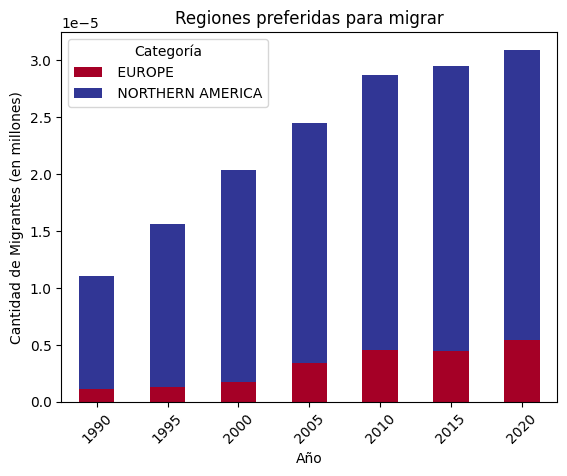

In [25]:
# Filtrar las categorías deseadas usando str.contains
filtered_data = latin_america_continent[latin_america_continent['Category'].str.contains('NORTHERN AMERICA|EUROPE')]

# Convertir los valores a millones utilizando .loc[]
filtered_data.loc[:, 'Latin America and the Caribbean'] /= 1000000

# Agrupar los datos por año y categoría, y calcular la suma
grouped_data = filtered_data.groupby(['year', 'Category'])['Latin America and the Caribbean'].sum().unstack()

# Crear el gráfico de barras
ax = grouped_data.plot(kind='bar', stacked=True, colormap='RdYlBu')

# Agregar título y etiquetas
plt.title('Regiones preferidas para migrar')
plt.xlabel('Año')
plt.ylabel('Cantidad de Migrantes (en millones)')
plt.xticks(rotation=45)
plt.legend(title='Categoría')

# Mostrar el gráfico
plt.show()

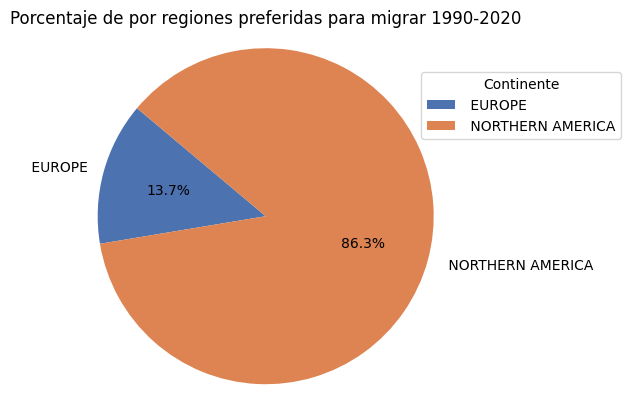

In [530]:
# Filtrar las categorías deseadas
filtered_data = latin_america_continent[latin_america_continent['Category'].str.contains('NORTHERN AMERICA|EUROPE')]

# Convertir los valores a millones utilizando .loc
filtered_data.loc[:, 'Latin America and the Caribbean'] /= 1000000

# Agrupar los datos por categoría y calcular la suma
grouped_data = filtered_data.groupby('Category')['Latin America and the Caribbean'].sum()

# Calcular los porcentajes de cada categoría en relación con el total
total = grouped_data.sum()
percentages = grouped_data / total * 100

# Crear un DataFrame con los porcentajes
percentages_df = pd.DataFrame({'Category': percentages.index, 'Percentage': percentages.values})

# Agregar el símbolo de porcentaje y redondear los valores a dos decimales
percentages_df['Percentage'] = percentages_df['Percentage'].apply(lambda x: f"{x:.2f}%")

# Crear el gráfico de torta
plt.figure()
plt.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("deep"))
plt.title('Porcentaje de por regiones preferidas para migrar 1990-2020')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.legend(title='Continente', loc='center left', bbox_to_anchor=(0.8, 0.8))  # Agregar leyenda

# Mostrar el gráfico
plt.show()